<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-и-замена-пропусков-в-значениях" data-toc-modified-id="Поиск-и-замена-пропусков-в-значениях-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск и замена пропусков в значениях</a></span></li><li><span><a href="#Изучение-типов-данных-в-столбцах" data-toc-modified-id="Изучение-типов-данных-в-столбцах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение типов данных в столбцах</a></span></li><li><span><a href="#Устранение-дубликатов" data-toc-modified-id="Устранение-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Устранение дубликатов</a></span></li><li><span><a href="#Удаление-аномальных-значений" data-toc-modified-id="Удаление-аномальных-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление аномальных значений</a></span></li></ul></li><li><span><a href="#Добавление-новых-информативных-столбцов" data-toc-modified-id="Добавление-новых-информативных-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление новых информативных столбцов</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-объектов" data-toc-modified-id="Изучение-параметров-объектов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров объектов</a></span></li><li><span><a href="#Исследования-скорости-продажи-квартир" data-toc-modified-id="Исследования-скорости-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследования скорости продажи квартир</a></span></li><li><span><a href="#Выявление-факторов,-влияющих-на-стоимость-объектов" data-toc-modified-id="Выявление-факторов,-влияющих-на-стоимость-объектов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выявление факторов, влияющих на стоимость объектов</a></span></li><li><span><a href="#Рассчет-средней-цены-одного-квадратного-метра" data-toc-modified-id="Рассчет-средней-цены-одного-квадратного-метра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Рассчет средней цены одного квадратного метра</a></span></li><li><span><a href="#Выявление-зависимости-цены-квадратного-метра-от-удаленности-об'екта-от-центра" data-toc-modified-id="Выявление-зависимости-цены-квадратного-метра-от-удаленности-об'екта-от-центра-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выявление зависимости цены квадратного метра от удаленности об'екта от центра</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Исследование надежности заемщиков - анализ банковских данных

***Цель:***  Используя данные сервиса Яндекс.Недвижимость необходимо выявить основные параметры и факторы, влияющие на рыночную цену квартиры.

***Данные:*** Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет:

## Знакомство с данными 

In [1]:
import pandas as pd  # импортируем библиотеку pandas
import matplotlib.pyplot as plt # импортируем matplotlib.pyplot 
import warnings
warnings.simplefilter("ignore")

In [2]:
# читаем файл с данными и присваиваем его переменной data
data = pd.read_csv('real_estate_data.csv', sep ='\t')

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

In [4]:
data.T # выведем данные на экран, транспонируем таблицу, чтобы было проще ознакомиться с имеющимися в ней столбцами

,0,1,2,3,4,5,6,7,8,9,...,23689,23690,23691,23692,23693,23694,23695,23696,23697,23698
total_images,20,7,10,0,2,10,6,5,20,18,...,13,3,11,2,9,9,14,18,13,4
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0,2890000.0,3700000.0,7915000.0,2900000.0,5400000.0,...,3550000.0,5500000.0,9470000.0,1350000.0,4600000.0,9700000.0,3100000.0,2500000.0,11475000.0,1350000.0
total_area,108.0,40.4,56.0,159.0,100.0,30.4,37.3,71.6,33.16,61.0,...,35.3,52.0,72.9,30.0,62.4,133.81,59.0,56.7,76.75,32.3
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00,2018-09-10T00:00:00,2017-11-02T00:00:00,2019-04-18T00:00:00,2018-05-23T00:00:00,2017-02-26T00:00:00,...,2018-02-28T00:00:00,2018-07-19T00:00:00,2016-10-13T00:00:00,2017-07-07T00:00:00,2016-08-05T00:00:00,2017-03-21T00:00:00,2018-01-15T00:00:00,2018-02-11T00:00:00,2017-03-28T00:00:00,2017-07-21T00:00:00
rooms,3,1,2,3,2,1,1,2,1,3,...,1,2,2,1,3,3,3,2,2,1
ceiling_height,2.7,NaN,NaN,NaN,3.03,NaN,NaN,NaN,NaN,2.5,...,2.86,NaN,2.75,NaN,2.6,3.7,NaN,NaN,3.0,2.5
floors_total,16.0,11.0,5.0,14.0,14.0,12.0,26.0,24.0,27.0,9.0,...,15.0,5.0,25.0,5.0,9.0,5.0,5.0,3.0,17.0,5.0
living_area,51.0,18.6,34.3,NaN,32.0,14.4,10.6,NaN,15.43,43.6,...,16.3,31.0,40.3,17.5,40.0,73.3,38.0,29.7,NaN,12.3
floor,8,1,4,9,13,5,6,22,26,7,...,4,2,7,4,8,3,4,1,12,1
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


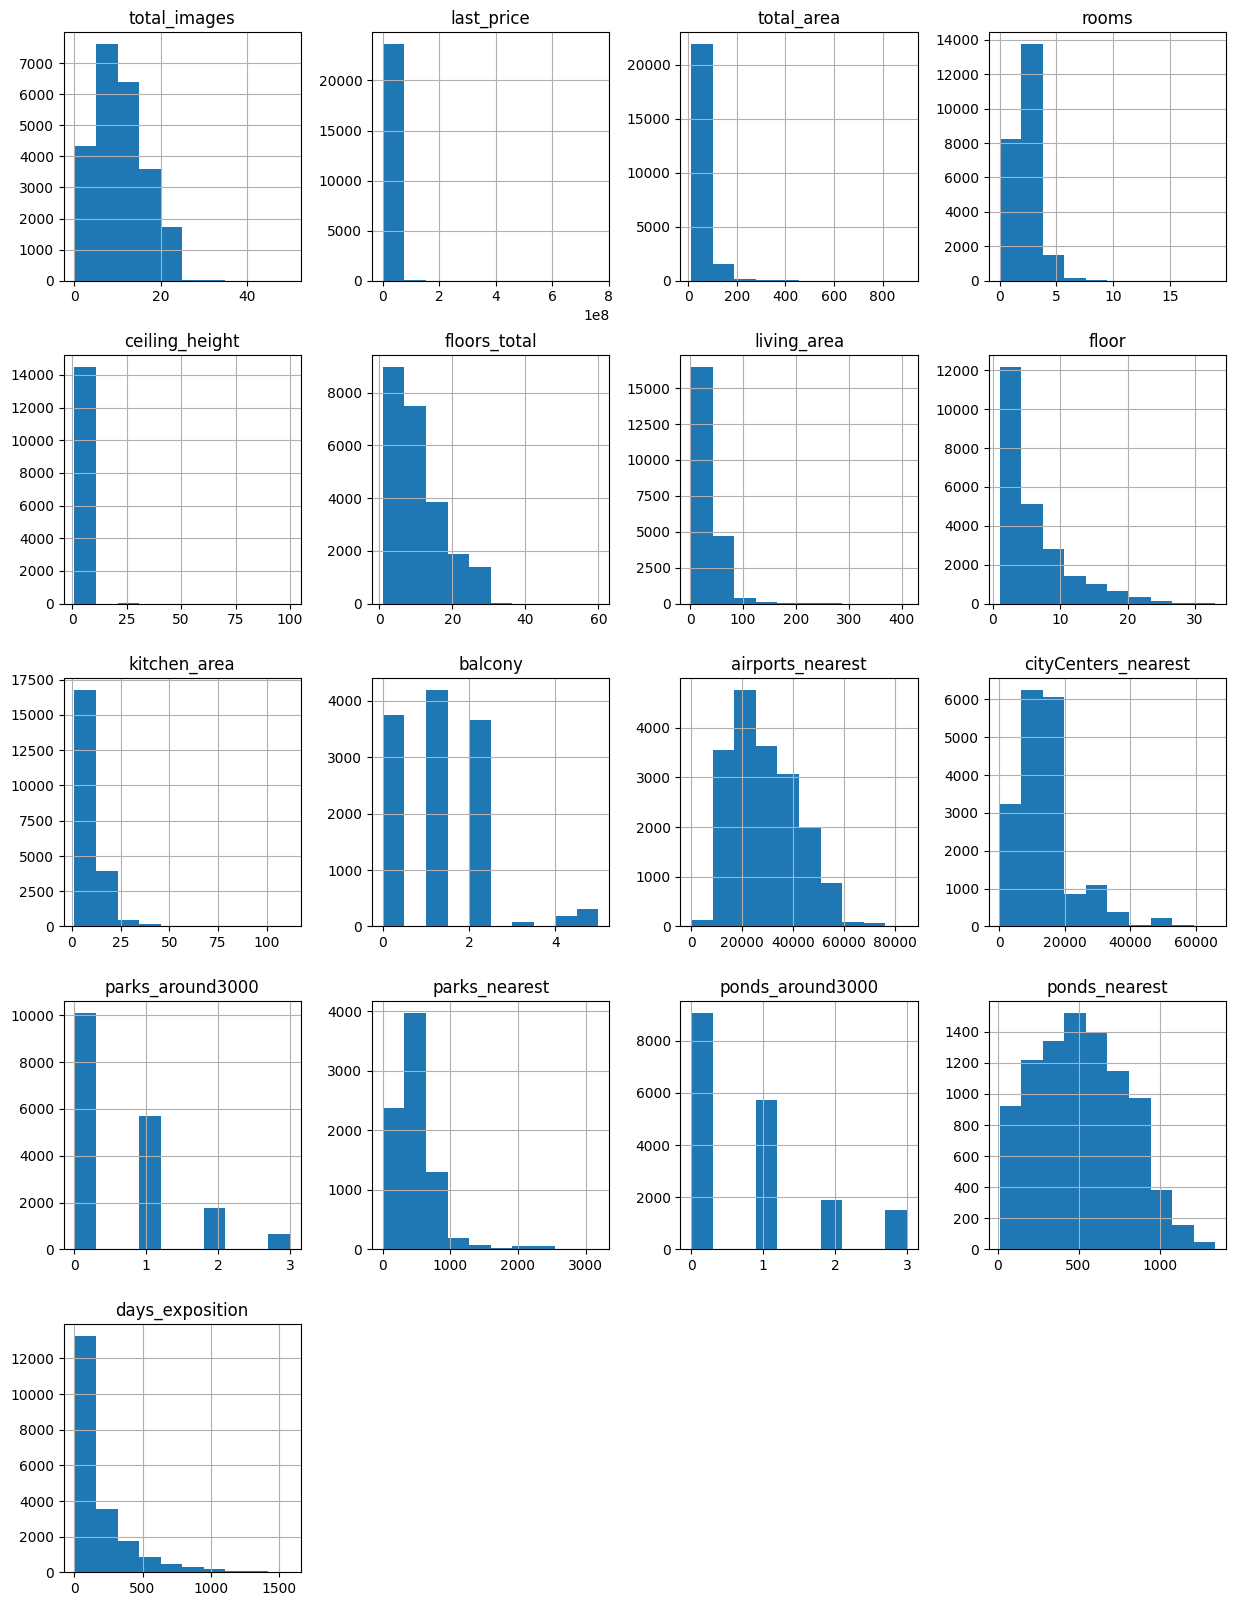

In [5]:
data.hist(figsize=(15, 20)) # выведем на экран графики распределения значений не категориальных переменных датасета
plt.show()

После знакомства с данными бросается в глаза большое количество пропусков данных в столбцах `is_apartment`, `ceiling_height`. Тип данных в столбце `first_day_exposition ` указан как object, тогда как это дата публикации объявления и формат должен быть `datetime`, целочисленных формат int следует применить к столбцам `balcony `, `floors_total`, а так для столбца `is_apartment`  должен быть объявлен формат bool.

Из графиков распределения значений бросается в глаза разброс значений в столбце `ceiling_height`, которые достигают 100 м. 
Так же в столбце `rooms` значения больше 15 вызывают подозрения.

## Предобработка данных

### Поиск и замена пропусков в значениях

Найдем и изучим пропущенные значения в столбцах

In [6]:
data.isna().sum() # выведем на экран колличество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Исходя из вышепредставленных данных всего в датасете присутствует *23699* строк.
Больше чем в половине столбцов присутствуют пропуски.

- `ceiling_height` — вероятно, эти значения были пропущены при заполнении, можно заполнить медианным значением по каждому городу 

- `floors_total` — вероятно, эти значения были пропущены при заполнении, таких значений немного, заменить ничем невозможно, а на стоимость жилья они влияют, вероятно,таких пропусков немного, лучше удалить 

- `living_area` — пропущено 8% значений при заполнении данные, можно заполнить медианным значением исходя из количества комнат

- `is_apartment` — вероятно, пропущенные значения, которых большее количество означают, что данный тип жилья не аппартаменты, стоит заменить значения NaN на False и поменять тип данных в столбце

- `balcony` — будем считать, что отсутсвие значений означает отсутствие балконов и заменим NaN на 0, так же следует изменить тип данных на int

- `locality_name` — таких пропусков немного, заменить ничем невозможно, а на стоимость жилья они влияют, вероятно,таких пропусков немного, лучше удалить 


In [7]:
data=data.dropna(subset=['floors_total','locality_name']).reset_index(drop=True) 
# удаляем строки,где пропущены количество этажей в доме и название населенного пункта, таких значпний немного,можно ими пренебречь
data['balcony'] = data['balcony'].fillna(0)# заменяем пропуски балконов на их отсутствие 
data['is_apartment'] = data['is_apartment'].fillna(False) # заменяем пропуски утверждения об апартаментах значением False
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


После удаления строк с пропусками в `floors_total` и `locality_name`, а так же замене пропусков в `balcony` на "0", а `is_apartment`на "False" пропусков по вышеописанным категориям не осталось.

In [8]:
for i in data['rooms'].unique(): # для каждой ячейки в столбце 'rooms' 
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] =\
    data.loc[(data['rooms'] == i), 'living_area'].median()
#находим пустое значение в столбце 'living_area' и заполняем его медианным значением
#по столбцу 'living_area' при условии что значение ячейки 'rooms' равно i
print(data['living_area'].isna().sum()) # проверим остались ли пропуски в столбце 'living_area'


0


Пропусков по `living_area` не осталось.

Пропуски по `ceiling_height` пока что заменять не будем, сначала поработаем с неявными дубликатами в столбце `locality_name`

### Изучение типов данных в столбцах

Рассмотрим типы данных в каждом столбце:
- Найдём столбцы, в которых нужно изменить тип данных.
- Преобразуем тип данных в выбранных столбцах.

In [9]:
data.info() # вспомним какие типы об'ектов хранит датасет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

После всех преобразований в датасете осталось `23565` строки вместо `23699`

`first_day_exposition ` лучше поменять на `datetime`, чтобы в дальнейшем было комфортнее работать

`floors_total`, `balcony` заменим на `int`, т.к. не бывает не целого количества этажей и балконов.

Остальные переменные можно оставить при существующих типах

In [10]:
# изменим тип данных в столбце 'first_day_exposition' на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# меняем тип данных в стоблбце 'floors_total','balcony' на 'int'
data['floors_total']=data['floors_total'].astype(int) 
data['balcony']=data['balcony'].astype(int)
data.info() # проверим, поменялись ли типы данных на ожидаемые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [11]:
#Изменим значения в столбце `last_price` с рублей на млн.руб для удобства восприятия
data['last_price']=data['last_price']/1000000

### Устранение дубликатов

In [12]:
print(data['locality_name'].nunique()) # выведем количество уникальных значений в новой переменной
print(data['locality_name'].unique()) # посмотрим, какие значения существуют в столбце

364
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый

In [13]:
data['locality_name'] =\
data['locality_name'].str.replace('посёлок', "поселок")
# заменим "посёлок" на "поселок"
data['locality_name'] =\
data['locality_name'].str.replace('поселок городского типа', "поселок")
# заменим "поселок городского типа" на "поселок"
data['locality_name'] =\
data['locality_name'].str.replace('городской поселок', "поселок")
# заменим "городской поселок" на "поселок"
print(data['locality_name'].nunique()) # выведем количество уникальных значений в новой переменной
print(data['locality_name'].unique()) # проверим, что данные заменились корректно

322
['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши'
 'Луга' 'Волос

Таким образом, после замены названий населённых пунктов, мы получили новую переменную, в которой осталось `322` уникальных значения вместо `364`

менять "коттеджный поселок" на "поселок" мы не будем, т.к. это уже могут быть разные локации.

In [14]:
print(data.duplicated().sum()) # проверим есть ли в датасете дубликаты

0


Дубликатов в датасете нет.

Теперь можно заменить пропуски в столбце `ceiling_height` медианным значением по населенным пунктам

In [15]:
for i in data['locality_name'].unique(): # для каждой ячейки в столбце 'locality_name' 
    data.loc[(data['locality_name'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] =\
    data.loc[(data['locality_name'] == i), 'ceiling_height'].median()    
#находим пустое значение в столбце 'ceiling_height' и заполняем его медианным значением
#по столбцу 'ceiling_height' при условии что значение ячейки 'locality_name' равно i

In [16]:
print(data['ceiling_height'].isna().sum()) # проверим остались ли пропуски в столбце 'ceiling_height'

100


После замены `ceiling_height` на медианные значения по `locality_name`, осталось 100 пропусков. 
Это связано с тем, что для данных населенных пунктов высоты потолков совсем не указывались.

Заменить чем-либо разумным оставшиеся параметры не представляется возможным, поэтому, оставим пропуски в них.

### Удаление аномальных значений

In [17]:
print(data['ceiling_height'].sort_values().unique())# выведем на экран уникальные значения столбца 'ceiling_height'

[  1.      1.2     1.75    2.      2.2     2.25    2.3     2.34    2.4
   2.45    2.46    2.47    2.48    2.49    2.5     2.51    2.52    2.525
   2.53    2.54    2.55    2.555   2.56    2.56    2.57    2.575   2.58
   2.59    2.6     2.6     2.61    2.615   2.62    2.625   2.63    2.64
   2.65    2.65    2.66    2.67    2.675   2.68    2.69    2.7     2.71
   2.72    2.725   2.73    2.74    2.75    2.76    2.77    2.78    2.79
   2.8     2.81    2.82    2.83    2.84    2.85    2.86    2.87    2.88
   2.89    2.9     2.91    2.92    2.93    2.94    2.95    2.96    2.97
   2.98    2.99    3.      3.01    3.02    3.03    3.04    3.05    3.06
   3.07    3.08    3.09    3.1     3.11    3.12    3.13    3.14    3.15
   3.16    3.17    3.18    3.2     3.21    3.22    3.23    3.24    3.25
   3.26    3.27    3.28    3.29    3.3     3.31    3.32    3.33    3.34
   3.35    3.36    3.37    3.38    3.39    3.4     3.42    3.43    3.44
   3.45    3.46    3.47    3.48    3.49    3.5     3.51    3.52 

Высота потолков в датасете представлена значениями от 1 до 100. Вряд ли высота потолков может быть ниже 2 метров и выше 7(с учетом двухуровневых квартир). 

Предположим, что высоты не менее 20 метров-это ошибка при вводе и разделим такие значения на 10.

In [18]:
data.loc[data['ceiling_height']>=20, 'ceiling_height'] = data.loc[data['ceiling_height']>=20, 'ceiling_height'] / 10
# разделим значения не менее 20 метров на 10
data = data[(data['ceiling_height'] >= 2)&(data['ceiling_height']<=7)] 
# удалим строки, в которых значения потолков менее 2 метров и более 7
print(data['ceiling_height'].sort_values().unique())
# Посмотрим как именились значения

[2.    2.2   2.25  2.26  2.3   2.34  2.4   2.45  2.46  2.47  2.48  2.49
 2.5   2.51  2.52  2.525 2.53  2.54  2.55  2.555 2.56  2.56  2.57  2.575
 2.58  2.59  2.6   2.6   2.61  2.615 2.62  2.625 2.63  2.64  2.65  2.65
 2.66  2.67  2.675 2.68  2.69  2.7   2.71  2.72  2.725 2.73  2.74  2.75
 2.76  2.77  2.78  2.79  2.8   2.81  2.82  2.83  2.84  2.85  2.86  2.87
 2.88  2.89  2.9   2.91  2.92  2.93  2.94  2.95  2.96  2.97  2.98  2.99
 3.    3.01  3.02  3.03  3.04  3.05  3.06  3.07  3.08  3.09  3.1   3.11
 3.12  3.13  3.14  3.15  3.16  3.17  3.18  3.2   3.21  3.22  3.23  3.24
 3.25  3.26  3.27  3.28  3.29  3.3   3.31  3.32  3.33  3.34  3.35  3.36
 3.37  3.38  3.39  3.4   3.42  3.43  3.44  3.45  3.46  3.47  3.48  3.49
 3.5   3.51  3.52  3.53  3.54  3.55  3.56  3.57  3.58  3.59  3.6   3.62
 3.63  3.65  3.66  3.67  3.68  3.69  3.7   3.75  3.76  3.78  3.8   3.82
 3.83  3.84  3.85  3.86  3.87  3.88  3.9   3.93  3.95  3.98  4.    4.06
 4.1   4.14  4.15  4.19  4.2   4.25  4.3   4.37  4.4   4.45  4.

Посмотрим какие значения хранит в себе столбец `floors_total`

In [19]:
print(data['floors_total'].unique()) # выведем на экран значения в столбце 'floors_total'

[16 11  5 14 12 26 24 27  9  6 17 25  3 23 19 18  4 22  8  2 10  7 13 15
 20 28 36 21 35 34 60  1 29 33 52]


По данным википедии самое высокое жилое здание в Ленинградской области имеет 37 этажей.

Удалим значения, выходящие за эти рамки

In [20]:
data = data[data['floors_total'] <= 37] # оставляем в датасете строки, где значение этажа не более 37в
print(data['floors_total'].unique())# проверяем, что всё в порядке

[16 11  5 14 12 26 24 27  9  6 17 25  3 23 19 18  4 22  8  2 10  7 13 15
 20 28 36 21 35 34  1 29 33]


In [21]:
print(data['floor'].unique())# посмотрим уникальные значения этажей, на которых расположены крартиры

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]


Со значениями этажа квартиры проблем, вроде как, не имеем.

Теперь посмотрим на количество комнат в квартирах `rooms`

In [22]:
print(data['rooms'].value_counts())# посмотрим сколько комнат бывает в квартирах

1     7971
2     7841
3     5758
4     1172
5      325
0      192
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


Не часто встретишь квартиру, в которой больше 4-х комнат, а в датасете есть значения и больше 10, хотя их не много. Исходя из количества квартир(достаточно для хоть како-то статистики), не будем учитывать те, в которых комнат больше 7.

In [23]:
data = data[data['rooms'] <= 7] #оставляем строки со значением в "rooms" не более 7
print(data['rooms'].unique()) # проверяем

[3 1 2 4 5 6 0 7]


Посмотрим какое количество балконов существует.

In [24]:
print(data['balcony'].value_counts())#выведем на экран количество значение и количество балконов

0    15053
1     4159
2     3644
5      303
4      182
3       81
Name: balcony, dtype: int64


За редким исключением бывают квартиры с тремя балконами, что уж говорить о 4-х и 5-ти.

In [25]:
data = data[data['balcony'] <= 3] #оставляем строки со значением в "balcony" не более 3
print(data['balcony'].unique()) # проверяем, получилось ли

[0 2 1 3]


Посмотрим, какие бывают площади квартир:

In [26]:
print(data['total_area'].sort_values().unique())

[ 12.   13.   13.2 ... 618.  631.  631.2]


In [27]:
display(data[data['total_area'] >= 500]) #посмотрим сколько комнат в квартирах более 500 кв.м

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3103,19,140.0,631.0,2019-03-30,7,2.70,5,145.00,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4216,1,50.0,517.0,2017-10-14,7,2.70,4,332.00,3,False,...,22.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5863,3,230.0,500.0,2017-05-31,6,2.70,7,124.40,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
7977,20,84.0,507.0,2015-12-17,5,4.45,7,301.50,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
12787,20,140.0,631.2,2019-04-09,7,3.90,4,322.30,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
14930,8,150.0,500.0,2016-01-13,4,3.20,7,63.65,7,False,...,NaN,0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
15565,20,300.0,618.0,2017-12-18,7,3.40,7,258.00,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0


Бывают квартиры до 631.2 м.кв, однако у таких квартир и количество комнат достаточное. 

Таким образом, были устранены аномальные значения в следующих столбцах:
- `balcony`
- `ceiling_height`
- `floor`
- `floors_total`
- `rooms`

По остальным столбцам оценить анамалии на взгляд не представляется возможным

## Добавление новых информативных столбцов

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

In [28]:
data['price_sqr_m'] = data['last_price'] / data['total_area']
# найдем цену за один квадратный метр разделив стоимость квартиры на ее общую площадь

In [29]:
# последовательно добавим столбцы в днем недели, месяцем и годом объявлнения
data['week_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22937 entries, 0 to 23564
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22937 non-null  int64         
 1   last_price            22937 non-null  float64       
 2   total_area            22937 non-null  float64       
 3   first_day_exposition  22937 non-null  datetime64[ns]
 4   rooms                 22937 non-null  int64         
 5   ceiling_height        22937 non-null  float64       
 6   floors_total          22937 non-null  int64         
 7   living_area           22937 non-null  float64       
 8   floor                 22937 non-null  int64         
 9   is_apartment          22937 non-null  bool          
 10  studio                22937 non-null  bool          
 11  open_plan             22937 non-null  bool          
 12  kitchen_area          20760 non-null  float64       
 13  balcony         

In [30]:
# создадим функию, которая будет определять тип этажа:
def floor_type (df):
    floor = df['floor'] # переменная для этажа
    total_floors = df['floors_total'] # переменная для этажности дома
    if floor == 1:                    
        return 'первый'
    elif floor == total_floors:       # условия
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1) # применим функцию к датафрейму, создав новый столбец

In [31]:
data['cityCenters_km'] = round((data['cityCenters_nearest']/1000),0) 
# создадим новый столбец с расстоямием до центра в километрах  и округлим полученные числа до целых

## Исследовательский анализ

### Изучение параметров объектов

Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

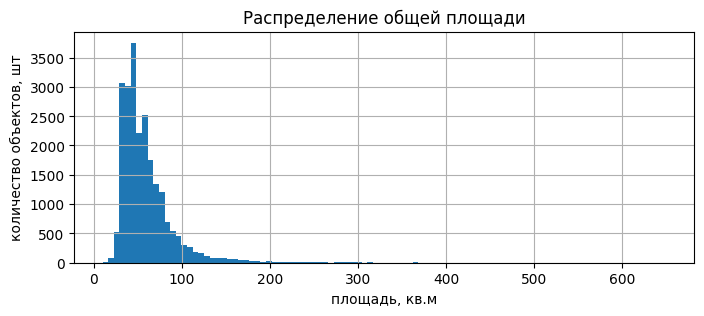

In [32]:
total_area_hist = data['total_area'].hist(bins = 100, range=(10, 650), figsize=(8,3))
total_area_hist.set_title('Распределение общей площади')
total_area_hist.set_xlabel ('площадь, кв.м')
total_area_hist.set_ylabel('количество объектов, шт')
plt.show()

Пик квартир на продажу расположен в районе 30-50 кв.м, что логично, т.к. большинство жилья это одна-двухкомнатные квартиры примерно такой площади.

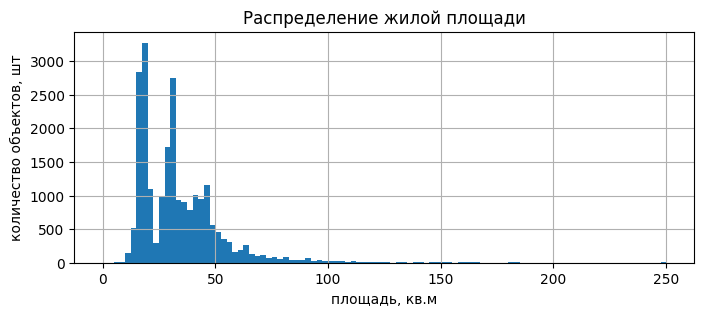

In [33]:
living_area_hist = data['living_area'].hist(bins = 100, range=(0, 250), figsize=(8,3))
living_area_hist.set_title('Распределение жилой площади')
living_area_hist.set_xlabel ('площадь, кв.м')
living_area_hist.set_ylabel('количество объектов, шт')
plt.show()

Здесь видно два пика в начале графика. Вероятно, первый связан с "бумом" квартир-студий, а так же популярных в Санкт-Петербурге маленьких двухуровневых квартир, второй со стандартным преобладанием на рынке квартир примерно равного метража.

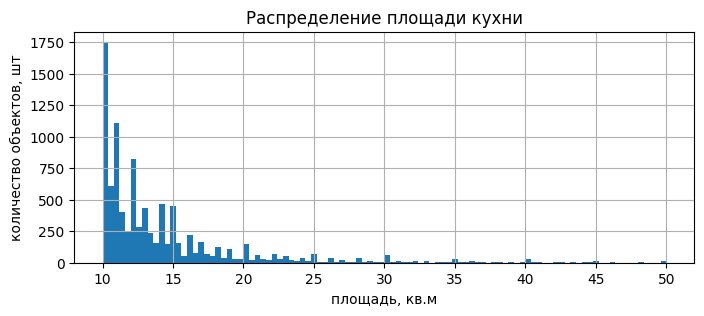

In [34]:
kitchen_area_hist = data['kitchen_area'].hist(bins = 100, range=(10, 50), figsize=(8,3))
kitchen_area_hist.set_title('Распределение площади кухни')
kitchen_area_hist.set_xlabel ('площадь, кв.м')
kitchen_area_hist.set_ylabel('количество объектов, шт')
plt.show()

Пик в самом начале графика так же говорит о том, что на рынке преобладают квартиры со стандартной планировкий и небольшой кухней

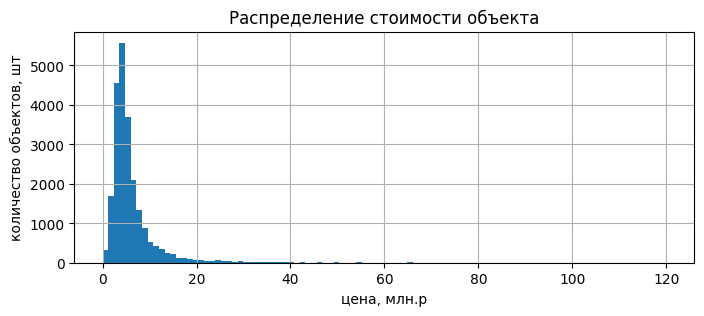

In [35]:
last_price_hist = data['last_price'].hist(bins = 100, range=(0, 120), figsize=(8,3))
last_price_hist.set_title('Распределение стоимости объекта')
last_price_hist.set_xlabel ('цена, млн.р')
last_price_hist.set_ylabel('количество объектов, шт')
plt.show()

Средний диапозон цен на квартиры в Санкт-Петербурге и Ленинградской области составляет 3-6 млн.руб

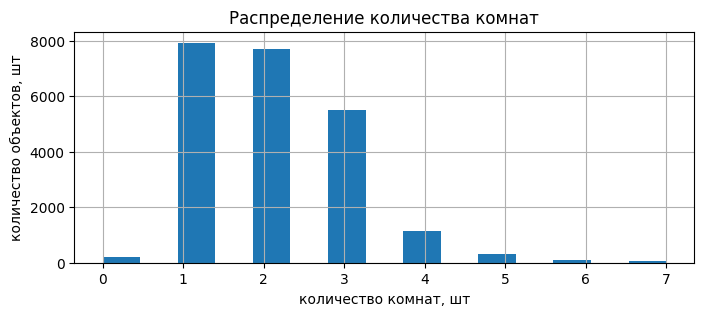

In [36]:
rooms_hist = data['rooms'].hist(bins = 15, range=(0, 7), figsize=(8,3))
rooms_hist.set_title('Распределение количества комнат')
rooms_hist.set_xlabel ('количество комнат, шт')
rooms_hist.set_ylabel('количество объектов, шт')
plt.show()

Больше всего продают 1-2-х комнатные квартиры

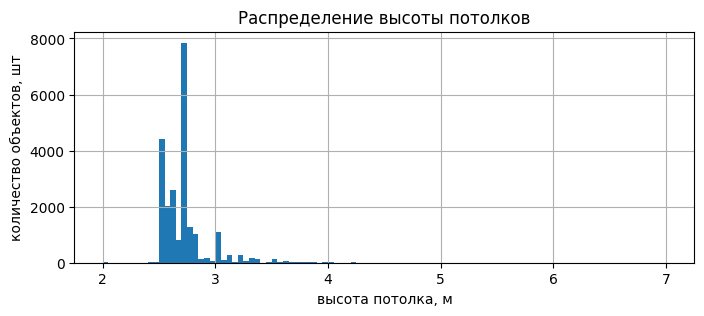

In [37]:
ceiling_height_hist = data['ceiling_height'].hist(bins = 100, range=(2, 7), figsize=(8,3))
ceiling_height_hist.set_title('Распределение высоты потолков')
ceiling_height_hist.set_xlabel ('высота потолка, м')
ceiling_height_hist.set_ylabel('количество объектов, шт')
plt.show()

Стандартом считаются потолки порядка 2,7 м, что и иллюстрирует график

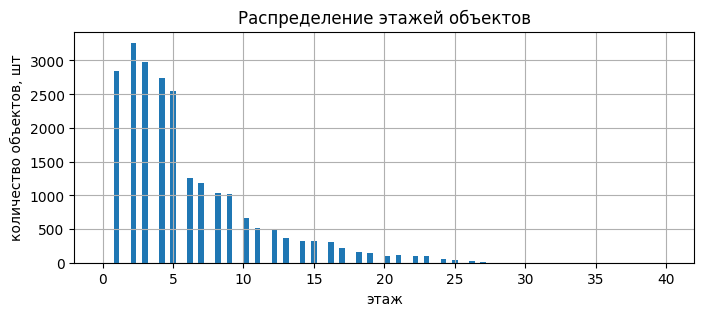

In [38]:
floor_hist = data['floor'].hist(bins = 100, range=(0,40 ), figsize=(8,3))
floor_hist.set_title('Распределение этажей объектов')
floor_hist.set_xlabel ('этаж')
floor_hist.set_ylabel('количество объектов, шт')
plt.show()

Чаще продают квартиры на 1-5 этажах, вероятно, это связано с большим количеством застроек пятиэтажных домов

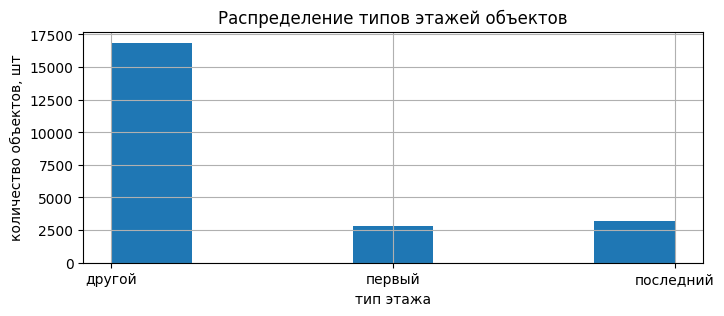

In [39]:
floor_type_hist = data['floor_type'].hist(bins = 7, figsize=(8,3))
floor_type_hist.set_title('Распределение типов этажей объектов')
floor_type_hist.set_xlabel ('тип этажа')
floor_type_hist.set_ylabel('количество объектов, шт')
plt.show()

Логично было предположить, что категория "другой" будет обладать преимуществом, т.к. в ней содержится большое разнообразие этажей.

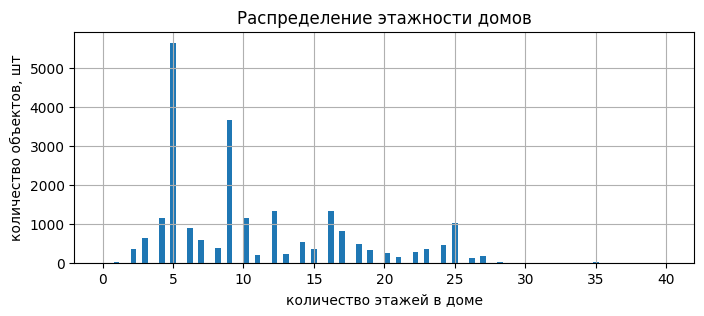

In [40]:
floors_total = data['floors_total'].hist(bins = 100, range=(0, 40), figsize=(8,3))
floors_total.set_title('Распределение этажности домов')
floors_total.set_xlabel ('количество этажей в доме')
floors_total.set_ylabel('количество объектов, шт')
plt.show()

На графике заметны два пика около 5 и 9 этажных домов. Все логично, в свое время проводились массовые застройки районов однотипными пяти- и девятиэтажками.

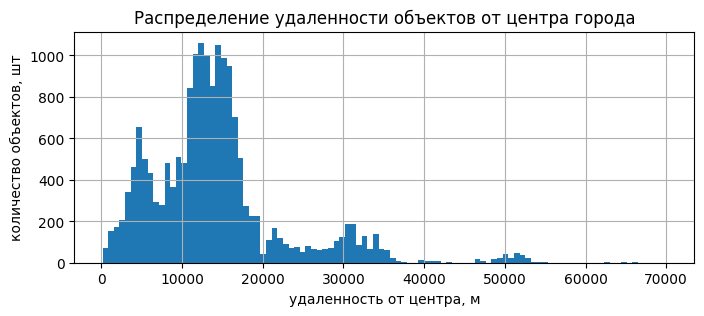

In [41]:
cityCenters_nearest_hist = data['cityCenters_nearest'].hist(bins = 100, range=(150, 70000), figsize=(8,3))
cityCenters_nearest_hist.set_title('Распределение удаленности объектов от центра города')
cityCenters_nearest_hist.set_xlabel ('удаленность от центра, м')
cityCenters_nearest_hist.set_ylabel('количество объектов, шт')
plt.show()

Первый пик наблюдается в пределах 5000 м от центра, второй порядка 15 км. Можно предположить, что второй пик связан с застройкой спальных районов. Остальные небольшие пики связаны с продажей квартир в равноудаленных населенных пунктах.

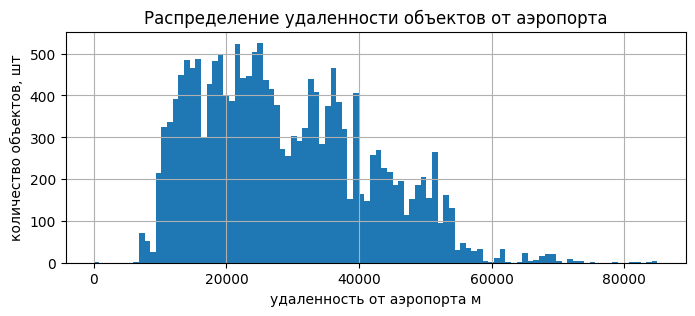

In [42]:
airports_nearest_hist = data['airports_nearest'].hist(bins = 100, range=(0, 85000), figsize=(8,3))
airports_nearest_hist.set_title('Распределение удаленности объектов от аэропорта')
airports_nearest_hist.set_xlabel ('удаленность от аэропорта м')
airports_nearest_hist.set_ylabel('количество объектов, шт')
plt.show()

Четких зависимостей киличества квартир на рынке от их удаленности от аэропортов не прослеживается.

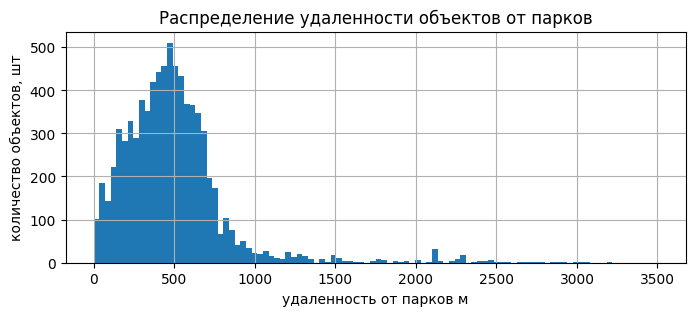

In [43]:
parks_nearest_hist = data['parks_nearest'].hist(bins = 100, range=(0, 3500), figsize=(8,3))
parks_nearest_hist.set_title('Распределение удаленности объектов от парков')
parks_nearest_hist.set_xlabel ('удаленность от парков м')
parks_nearest_hist.set_ylabel('количество объектов, шт')
plt.show()

Большинство квартир на рынке продаются с парками в районе 500м. Редко расстояние до парка составляет более 1500 км. 

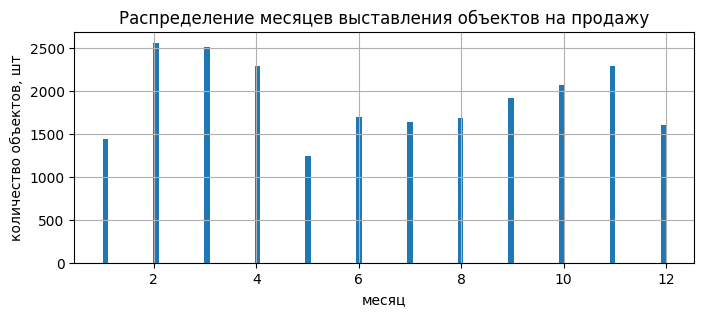

In [44]:
month_exposition_hist = data['month_exposition'].hist(bins = 100, range=(1, 12), figsize=(8,3))
month_exposition_hist.set_title('Распределение месяцев выставления объектов на продажу')
month_exposition_hist.set_xlabel ('месяц')
month_exposition_hist.set_ylabel('количество объектов, шт')
plt.show()

Реже всего люди выставляют квартиры на продажу в мае. Пики наблюдаются в феврале-апреле и ноябре.

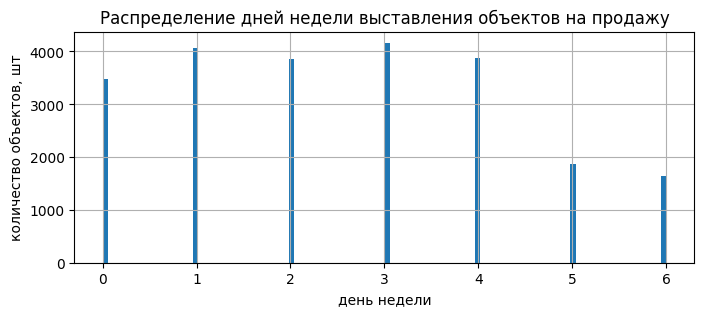

In [45]:
week_day_exposition_hist = data['week_day_exposition'].hist(bins = 100, range=(0, 6), figsize=(8,3))
week_day_exposition_hist.set_title('Распределение дней недели выставления объектов на продажу')
week_day_exposition_hist.set_xlabel ('день недели')
week_day_exposition_hist.set_ylabel('количество объектов, шт')
plt.show()

По субботам и воскресеньям люди реже выставляют квартиры на продажу, чем в будни.

Исходя из вышеописанных графиков, в целом, нет выбивающихся данных. Все распределения закономерны. 

### Исследования скорости продажи квартир

Рассмотрим, как быстро продавались квартиры
- Построим гистограмму.
- Посчитаем среднее и медиану.

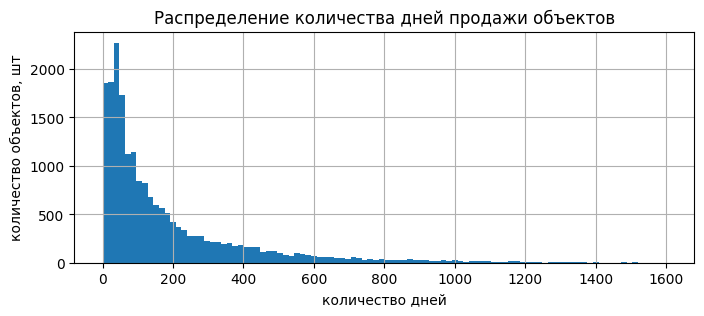

In [46]:
days_exposition_hist = data['days_exposition'].hist(bins = 100, range=(0, 1600), figsize=(8,3))
days_exposition_hist.set_title('Распределение количества дней продажи объектов')
days_exposition_hist.set_xlabel ('количество дней')
days_exposition_hist.set_ylabel('количество объектов, шт')
plt.show()

Из построенной диаграммы можно сделать вывод что чаще квартиры продаются в первые 100 дней, большой пик приходится в районе 45 дней.

In [47]:
data['days_exposition'].describe() # выведем на экран описание основных параметров столбца days_exposition

count    19892.000000
mean       180.691836
std        219.735682
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

В целом, большая часть квартир продается от полутора до 8 месяцев. Если квартира не продалась в первые пол года, то есть вероятность, что объявление будет висеть долго.

### Выявление факторов, влияющих на стоимость объектов

Рассмотрим зависит ли цена от:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров. 

Для наглядности картинки, далее на графиках будем менять масштабы так, чтобы большая часть выборки попадала на график и был заметен общий тренд.

Будем строить диаграммы рассеивания для разного типа площадей и количества комнат. Для этажей и даты размещения объявлений построим гистограммы.

In [48]:
print('Коэффициент корреляции равен -', round(data['last_price'].corr(data['total_area']),2))
# произведем рассчет коэффициента корреляции 

Коэффициент корреляции равен - 0.64


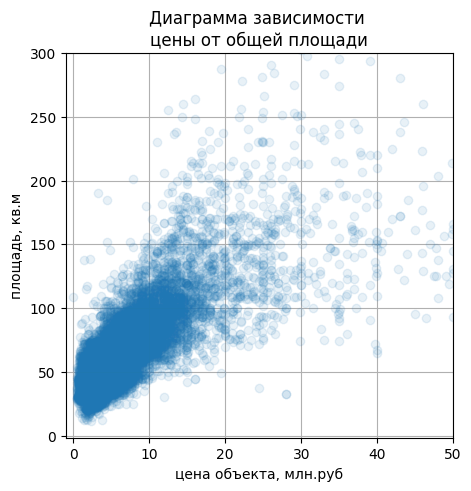

In [49]:
# построим диаграмму рассеивания зависимости цены от общей площади
data.plot(x='last_price', y='total_area', style='o', grid=True, figsize=(5, 5), alpha=0.1,legend=False,
          title = 'Диаграмма зависимости \nцены от общей площади', xlim=(-1,50),ylim=(-1,300),
         xlabel = ('цена объекта, млн.руб'), ylabel = ('площадь, кв.м'))
plt.show()

На диаграмме виден положительный тренд зависимости стоимости квартиры от её общей площади. Рассчитанный коэффициент корреляции сотсавляет 0,64, что интерпретируется как средняя корреляция. Такая закономерность логична: чем больше квадратных метров, тем дороже квартира.
Однако, корреляция не равна 1, следоавательно, существуют и другие факторы, влияющие на стоимость жилья.

In [50]:
print('Коэффициент корреляции равен -', round(data['last_price'].corr(data['living_area']),2))
# произведем рассчет коэффициента корреляции 

Коэффициент корреляции равен - 0.54


In [51]:
# построим диаграмму рассеивания зависимости цены от жилой площади
data.plot(x='last_price', y='living_area', style='o', grid=True, figsize=(5, 5), alpha=0.1, legend=False,
          title = 'Диаграмма зависимости \nцены от жилой площади' , xlim=(-1,50),ylim=(-1,200),
          xlabel = ('цена объекта, млн.руб'), ylabel = ('площадь, кв.м'))
plt.show()

Положительный тренд чуть более рассеянный, но тоже заметен. Коэффициент равен 0,54, что так же интерпретируется как средняя корреляция. Стоимость жилья зависит от размеров жилой площади, хоть и в меньшей степени чем от общей площади объекта. 

In [52]:
print('Коэффициент корреляции равен -', round(data['last_price'].corr(data['kitchen_area']),2))
# произведем рассчет коэффициента корреляции 

In [53]:
# построим диаграмму рассеивания зависимости цены от площади кухни
data.plot(x='last_price', y='kitchen_area', style='o', grid=True, figsize=(5, 5), alpha=0.1, legend=False,
        title = 'Диаграмма зависимости \nцены от площади кухни', xlim=(-1,50),ylim=(-1,60),
        xlabel = ('цена объекта, млн.руб'), ylabel = ('площадь, кв.м'))
plt.show()

Тренд еще более расплывчатый, чем для жилой пощади, но все еще положительный. Значение коэффициента корреляции интерпретируется как среднее, однако является его нижней границей. Зависимость, одако остается прежней: "Больше квадратных метров - выше стоимость жилья".

Исходя из корреляции различных видов площадей на итоговую стоимость объекта, можно сделать вывод о том, что больше всего влияет на конечную цену общая площадь квартиры, однако корреляция не прямая и  стоит брать во внимание и другие влияющие на цену параметры.

In [54]:
print('Коэффициент корреляции равен -', round(data['last_price'].corr(data['rooms']),2))
# произведем рассчет коэффициента корреляции 

In [55]:
# построим диаграмму рассеивания зависимости цены от количества комнат
data.plot(x='last_price', y='rooms', style='o', grid=True, figsize=(5, 5), alpha=0.3, legend=False,
          title = 'Диаграмма зависимости \nцены от количества комнат',xlim=(-1,150),
          xlabel = ('цена объекта, млн.руб'), ylabel = ('количество комнат, шт'))
plt.show()

Сначала видна прямая зависимость стоимости квартиры от количества в ней комнат, однако, после 3-х комнатных квартир зависимость уже не прослеживается. Можно предположить, что данная зависимость заключается в количестве квадратных метров. Могут быть просторные 4-х конматные квартыры и такого же метража 5-7-ми комнатные.
Рассчитанный коэффиуциент корреляции интерпретируется как слабый и составляет 0,35. 
Так же на графике видно, что 3-4-х квартиры бывают дешевыми относительно стоимости 6-7-ми комнатных.

In [56]:
# создадим сводную таблицу, где рассчитаем медианной значение стоимости жилья для каждого этажа
floor_chart = data.pivot_table(index ='floor', values = 'last_price', aggfunc = 'median')
# построим гистаграмму по созданной таблице
floor_chart.plot.bar(y='last_price', grid=True, figsize=(8, 7),legend=False,
                     title = 'Гистограмма зависимости \nцены от номера этажа',
                     xlabel = ('номер этажа'), ylabel = ('цена объекта, млн.руб'))
plt.show()

На гистограмме выше самое низкое рассчитанное значение для квартир на первом этаже. Так же разной степени спады наблюдаются для 5,9,17,26 и 31 этажей. Вероятно понижение стоимости связано с тем, что эти этажи последние для конкретных домов. Резкий скачок цен происходит на недвижимость, расположенную выше 28-го этажа.

In [57]:
# создадим сводную таблицу, где рассчитаем медианной значение стоимости жилья для каждого дня недели выставления объектов на продажу
week_day_exposition_chart = data.pivot_table(index ='week_day_exposition', values = 'last_price', aggfunc = 'median')
# построим гистаграмму по созданной таблице
week_day_exposition_chart.plot.bar(y='last_price', grid=True, figsize=(7, 4),legend=False,
                     title = 'Гистограмма зависимости \nцены от дня недели',
                     xlabel = ('день недели'), ylabel = ('цена объекта, млн.руб'))
plt.show()

Из диаграммы выше можно сделать вывод, что стоимость квартиры не зависит от дня выставления ее на продажу.

In [58]:
# создадим сводную таблицу, где рассчитаем медианной значение стоимости жилья для каждого месяца выставления объектов на продажу
week_day_exposition_chart = data.pivot_table(index ='month_exposition', values = 'last_price', aggfunc = 'median')
# построим гистаграмму по созданной таблице
week_day_exposition_chart.plot.bar(y='last_price', grid=True, figsize=(7, 4),legend=False,
                     title = 'Гистограмма зависимости \nцены от месяца',
                     xlabel = ('месяц'), ylabel = ('цена объекта, млн.руб'))
plt.show()

На диаграмме выше очевидную зависимость выявить сложно. Можно лишь отменить, что в июне выставляются на продажу квартиры дешевле, чем в остальные месяцы. Пик стоимости квартир приходится на апрель.

In [59]:
# создадим сводную таблицу, где рассчитаем медианной значение стоимости жилья для каждого года выставления объектов на продажу
week_day_exposition_chart = data.pivot_table(index ='year_exposition', values = 'last_price', aggfunc = 'median')
# построим гистаграмму по созданной таблице
week_day_exposition_chart.plot.bar(y='last_price', grid=True, figsize=(7, 4),legend=False,
                     title = 'Гистограмма зависимости \nцены от года',
                     xlabel = ('год'), ylabel = ('цена объекта, млн.руб'))
plt.show()

По графику можно сделать вывод, что после 2014 года на рынке произошел спад цен на объекты недвижимости. В период 2016-2018 гг рынок особых изменений не претерпевал, однако средяя стоимость объектов была ниже, чем в 2015 году. В 2019 году наблюдается положительная динамика роста цен на квартиры.

При выявлении факторов, влияющих на стоимость объектов, можно сделать однозначный вывод о том, что стоимость квартиры зависит от ее общей площади. Так же большей стоимостью обладают квартиры с количеством комнат более 3-х и располагающиеся выше 28-го этажа.

### Рассчет средней цены одного квадратного метра

In [60]:
price = data.pivot_table(index='locality_name', values = 'price_sqr_m', aggfunc = ['median','count'])
# создадим сводную таблицу, где будет отображаться название населенного пункта, количество 
#объявлений в нем и средняя цена квадратного метра
price.columns =['price_sqr_m_median','count_ads']
display(price.sort_values(by='count_ads', ascending=False).head(10))
# посмотрим на первые 10 его значений

В получившихся первых десяти населенных пунктах лидирует Санкт-Петербург: как по количеству объявлений так и по стоимости квадратного метра жилплощади. Здесь в среднем за один квадратный метр придется заплатить 104 тысячи рублей.

In [61]:
print(price.query ('locality_name == "Санкт-Петербург"')) # выведем на экран информацию о 
#населенном пункте с максимальной ценой за квадратный метр в топ 10 по количеству объявлений

Самое бюджетное жилье в Топ 10 городов по количеству объявлений можно приобрести в Выборге, где за один квадратный метр жлья придется заплатить 58233 тысячи рублей.

In [62]:
print(price.query ('locality_name == "Выборг"'))# выведем на экран информацию о 
#населенном пункте с минимальной ценой за квадратный метр в топ 10 по количеству объявлений

### Выявление зависимости цены квадратного метра от удаленности об'екта от центра

In [63]:
data_spb = data.query ('locality_name == "Санкт-Петербург"')
#создадим новую таблицу со значениями только по Санкт-Петербургу
price_distance = data_spb.pivot_table(index='cityCenters_km', values='last_price', aggfunc ='median',)
# сделаем сводную таблицу со средней ценой объекта для каждого километра
price_distance['last_price'] = round((price_distance['last_price']), 2)
# округлим значения в столбце 'last_price' до второго знака после запятой для удобства
display(price_distance)


In [64]:
data_spb.plot(x='last_price', y='cityCenters_km', style='o', grid=True, figsize=(5, 5), alpha=0.5,legend=False,
              title = 'Диаграмма зависимости \nцены от удаленности от центра', xlim=(-1,200),
              xlabel = ('удаленность от центра города, км'), ylabel = ('цена объекта, млн.руб'))
plt.show()

В целом удаленность от центра города безусловно влияет на стоимость объектов недвижимости, однако и в центре города можно найти бюджетные варианты. Вероятно, жилье в цетре будет менее просторным, чем аналогичное по цене, но дальше от центра.

На графике виден спад цен на жилье после 7 км от цетра города. 

Так же присутствуют локальные пики, вероятно, относящиеся к дорогим спальным районам.

## Вывод

По результатам исследования получены следующие результаты:

 - Самая дорогая недвижимость находится в Санкт-Петербурге, где в среднем за квадратный метр площади придется отдать более 100 тысяч рублей. Замыкает топ 10 по количеству объявлений на рынке город Выборг, где за квадратный метр жилплощади придется заплатить 58233 рублей. 

 - После 2014 года на рынке произошел спад цен на объекты недвижимости. В период 2016-2018 гг рынок особых изменений не претерпевал, однако средяя стоимость объектов была ниже, чем в 2015 году. В 2019 году наблюдается положительная динамика роста цен на квартиры. Средний диапозон цен на квартиры в Санкт-Петербурге и Ленинградской области составляет 3-6 млн.руб

 - Самые бюджетные квартиры располагаются на первом этаже. Разной степени спады на стоимость объектов наблюдаются для 5,9,17,26 и 31 этажей. Вероятно понижение стоимости связано с тем, что эти этажи последние для конкретных домов. Резкий скачок цен происходит на недвижимость, расположенную выше 28-го этажа.
 
 - Обычно на продажу выставляются как раз 1-3 комнатные квартиры. Безусловно есть зависимость стоимости жилья от количества комнат, ведь чем больше комнат, там больше квадратных метров приобретается. Однако явная зависимость прослеживается лишь до трехкомнатных квартир, далее рост комнат не сильно зависит от стоимости объектов, рассчитанные коэффициент корреляции в 0,35 это подтверждает. Часто квартиры площадью 30-50 кв.м, что подразумевает стандартную планировку 1-3-х комнатных квартир с кухней часто до 10 кв.м. Высота потолков часто стандартная в районе 2,5 - 3 м.

 - Большое количество квартир в объявлениях располагается в пределах 11-16 км от центра города, этажность домов преимущественно пяти и девяти этажные дома. Сами квартиры располагаются преимущественно на первых пяти этажах.

 - Чаще квартиры продаются до 100 дней. Объявления о продаже собственности чаще выставляют в будни дни чем по выходным. Реже всего люди выставляют квартиры на продажу в мае, чаще всего в феврале и марте.

Исходя из имеющихся данных можно сделать общий вывод о том, что стоимость жилья зависит от общей площади объектов недвижимости и их удаленности от центра города. 